In [ ]:
#This dataset presents the number of electric vehicles registered in the province of Nova Scotia, Canada, with an active licence plate attached. 

#This data breaks down the number of electric vehicles by vehicle model year, vehicle make and County of Nova Scotia in which the licence plate owner resides.

#Try visualizing this dataset using any tool you like. The main goal is to create a visualization that highlights useful insights from the data.

In [ ]:
!pip install pandas matplotlib seaborn plotly
!pip install geopandas folium


In [ ]:
pip install --upgrade pip

In [5]:
import pandas as pd

# load the dataset
df= pd.read_csv("Electric_Vehicle_Registration_Data.csv")

# preview the first 5 rows
df.head()

,DATE,NUMBER OF ELECTRIC VEHICLES,VEHICLE MODEL YEAR,VEHICLE MAKE,LOCATION,VEHICLE MODEL
0,2021/10/01,1,2006,TOYOTA,HALIFAX COUNTY,NaN
1,2021/10/01,1,2008,TOYOTA,HALIFAX COUNTY,NaN
2,2021/10/01,1,2009,NISSAN,VICTORIA COUNTY,NaN
3,2021/10/01,1,2009,TOYOTA,HALIFAX COUNTY,NaN
4,2021/10/01,1,2011,HYUNDAI,HALIFAX COUNTY,NaN


In [7]:
# check column names and data type
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20177 entries, 0 to 20176
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   DATE                         20177 non-null  object
 1   NUMBER OF ELECTRIC VEHICLES  20177 non-null  int64 
 2   VEHICLE MODEL YEAR           20177 non-null  int64 
 3   VEHICLE MAKE                 20177 non-null  object
 4   LOCATION                     20177 non-null  object
 5   VEHICLE MODEL                18208 non-null  object
dtypes: int64(2), object(4)
memory usage: 945.9+ KB


   VEHICLE MODEL YEAR  NUMBER OF ELECTRIC VEHICLES
0                1978                            4
1                1994                            4
2                2003                            8
3                2004                            3
4                2005                            1


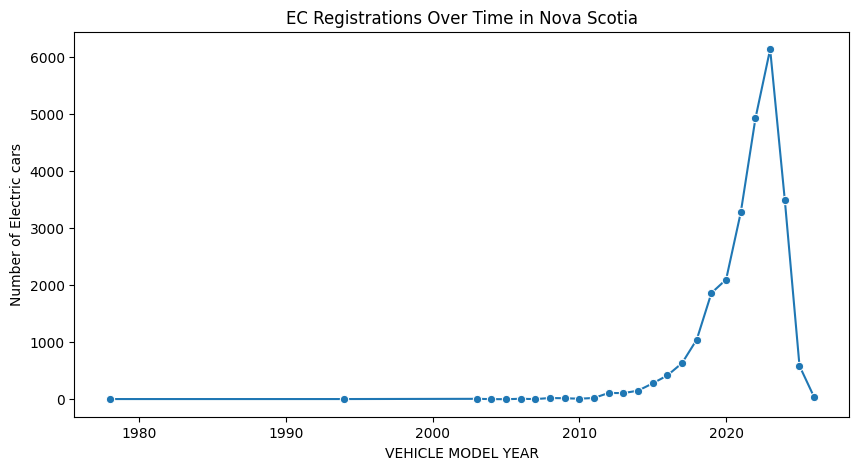

In [19]:
# EC electric cars Growth over years

import matplotlib.pyplot as plt
import seaborn as sns

ec_by_year = df.groupby("VEHICLE MODEL YEAR")["NUMBER OF ELECTRIC VEHICLES"].sum().reset_index()

print(ec_by_year.head(5))


plt.figure(figsize=(10,5))
sns.lineplot(data=ec_by_year, x="VEHICLE MODEL YEAR", y="NUMBER OF ELECTRIC VEHICLES", marker="o")
plt.title("EC Registrations Over Time in Nova Scotia")
plt.ylabel("Number of Electric cars")
plt.show()

   VEHICLE MAKE  NUMBER OF ELECTRIC VEHICLES
66        TESLA                         8908
29      HYUNDAI                         5272
13    CHEVROLET                         3112
21         FORD                         2287
49       NISSAN                         1157


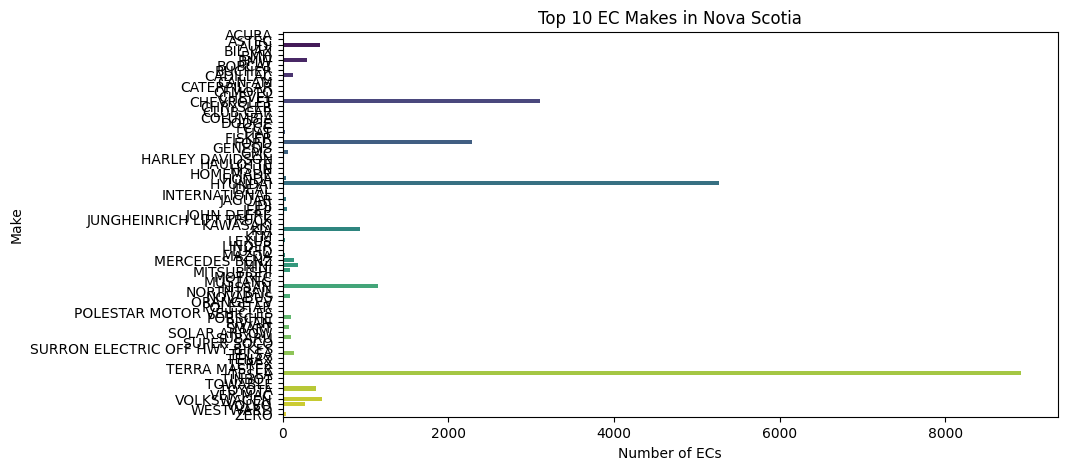

In [25]:
# EC electric cars Growth by vehicle make
ec_by_company = df.groupby("VEHICLE MAKE")["NUMBER OF ELECTRIC VEHICLES"].sum().reset_index()

print(ec_by_company.sort_values("NUMBER OF ELECTRIC VEHICLES", ascending=False).head(5))


plt.figure(figsize=(10,5))
sns.barplot(data=ec_by_company, x="NUMBER OF ELECTRIC VEHICLES", y="VEHICLE MAKE", hue="VEHICLE MAKE", palette="viridis")
plt.title("Top 10 EC Makes in Nova Scotia")
plt.xlabel("Number of ECs")
plt.ylabel("Make")
plt.show()


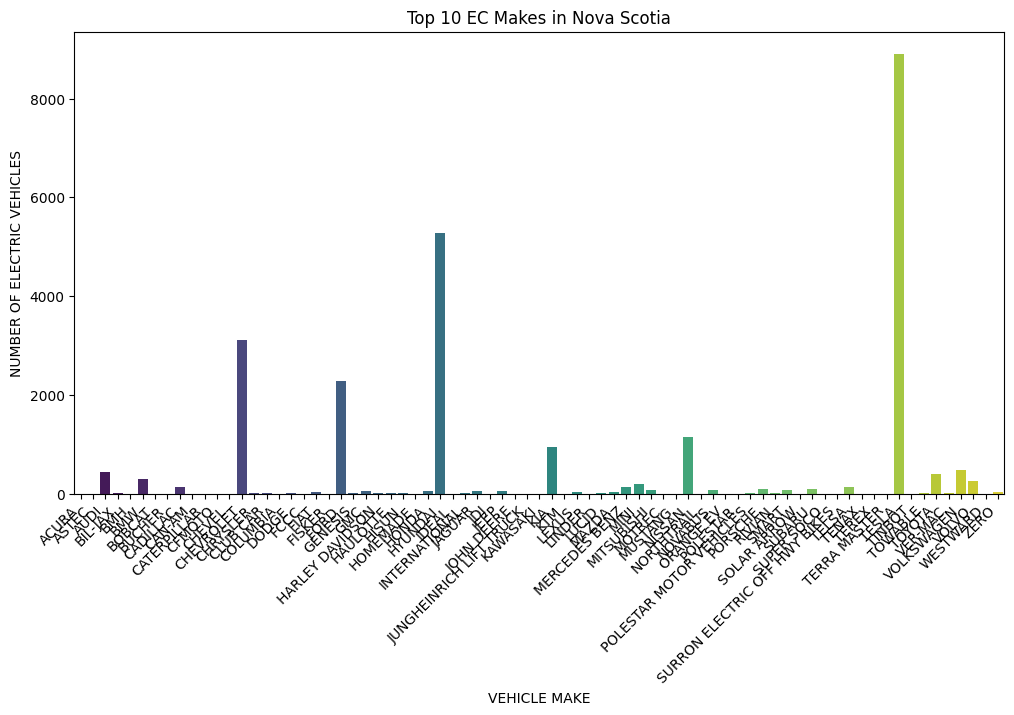

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=ec_by_company,
    x="VEHICLE MAKE", 
    y="NUMBER OF ELECTRIC VEHICLES",
    hue="VEHICLE MAKE",
    dodge=False,
    legend=False,
    palette="viridis"
)
plt.xticks(rotation=45, ha="right")  # rotate labels
plt.title("Top 10 EC Makes in Nova Scotia")
plt.show()

In [ ]:
# problem: How to edit the y axis to show fewer cars to be readable?

In [26]:
# EC electric cars by county
ec_by_county = df.groupby("LOCATION")["NUMBER OF ELECTRIC VEHICLES"].sum().reset_index()

print(ec_by_county.sort_values("NUMBER OF ELECTRIC VEHICLES", ascending=False).head(5))


             LOCATION  NUMBER OF ELECTRIC VEHICLES
22     HALIFAX COUNTY                        13854
21            HALIFAX                         2146
30       KINGS COUNTY                         1324
33   LUNENBURG COUNTY                         1137
12  COLCHESTER COUNTY                          931


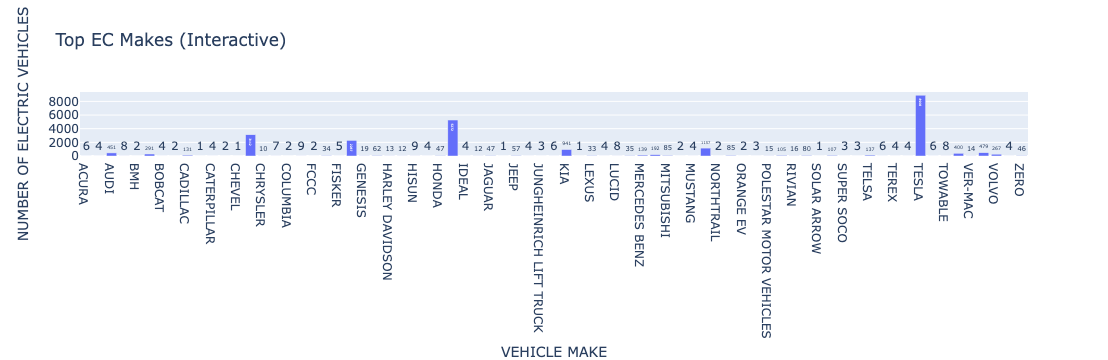

In [30]:
import plotly.express as px

fig = px.bar(ec_by_company, x="VEHICLE MAKE", y="NUMBER OF ELECTRIC VEHICLES", title="Top EC Makes (Interactive)", text="NUMBER OF ELECTRIC VEHICLES")
fig.show()
